## Flight Status Prediction (Exploratory Data Analysis)

In [1]:
# !pip install calmap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [12]:
!ls -GFlash ./data/ | grep parquet

442640 -rw-rw-r--@ 1 cristianmurillo  staff   215M Oct  7 16:57 Combined_Flights_2018.parquet
624376 -rw-rw-r--@ 1 cristianmurillo  staff   294M Oct  7 17:00 Combined_Flights_2019.parquet
357688 -rw-rw-r--@ 1 cristianmurillo  staff   175M Oct  7 17:03 Combined_Flights_2020.parquet
479168 -rw-rw-r--@ 1 cristianmurillo  staff   232M Oct  7 17:05 Combined_Flights_2021.parquet
292288 -rw-rw-r--@ 1 cristianmurillo  staff   143M Oct  7 17:08 Combined_Flights_2022.parquet


In [3]:
parquet_files = glob('./data/Combined_*.parquet')
parquet_files

['./data/Combined_Flights_2018.parquet',
 './data/Combined_Flights_2019.parquet',
 './data/Combined_Flights_2022.parquet',
 './data/Combined_Flights_2020.parquet',
 './data/Combined_Flights_2021.parquet']

In [45]:
df_temp = None

In [4]:
columns_subset = (
  'FlightDate',
  'Flight_Number_Marketing_Airline',
  'Airline',
  'Origin',
  'Dest',
  'Cancelled',
  'Diverted',
  'CRSDepTime',                       # expected departed time
  'DepTime',                          # actual departure time
  'DepDelayMinutes',                  # departure delay in minutes (0.0 if no delay)
  'OriginAirportID',
  'OriginCityName',
  'OriginStateName',
  'DestAirportID',
  'DestCityName',
  'DestStateName',
  'TaxiOut',
  'TaxiIn',
  'CRSArrTime',                       # expected arrival time
  'ArrTime',                          # actual arrival time 
  'ArrDelayMinutes'                   # arrival delay in minutes (0.0 if no delay)
)
dfs = []

for file in parquet_files:
  dfs.append(pd.read_parquet(file, columns=columns_subset))

df = pd.concat(dfs)

cat_cols = ['Airline', 'Origin', 'Dest', 'OriginStateName', 'DestCityName', 'DestStateName']
for cat in cat_cols:
  df[cat] = df[cat].astype('category')


In [46]:
df.columns

Index(['FlightDate', 'Flight_Number_Marketing_Airline', 'Airline', 'Origin',
       'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'OriginAirportID', 'OriginCityName',
       'OriginStateName', 'DestAirportID', 'DestCityName', 'DestStateName',
       'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes'],
      dtype='object')

In [47]:
df.head()

,FlightDate,Flight_Number_Marketing_Airline,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,2018-01-23,3298,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,14.0,7.0,1304,1256.0,0.0
1,2018-01-24,3298,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,13.0,12.0,1304,1258.0,0.0
2,2018-01-25,3298,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,18.0,11.0,1304,1302.0,0.0
3,2018-01-26,3298,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1304,1253.0,0.0
4,2018-01-27,3298,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,...,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1500,1459.0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29193782 entries, 0 to 573778
Data columns (total 21 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Flight_Number_Marketing_Airline  int64         
 2   Airline                          category      
 3   Origin                           category      
 4   Dest                             category      
 5   Cancelled                        bool          
 6   Diverted                         bool          
 7   CRSDepTime                       int64         
 8   DepTime                          float64       
 9   DepDelayMinutes                  float64       
 10  OriginAirportID                  int64         
 11  OriginCityName                   object        
 12  OriginStateName                  category      
 13  DestAirportID                    int64         
 14  DestCityName                     c

In [23]:
df['Airline'].value_counts()

Southwest Airlines Co.                       1352552
United Air Lines Inc.                         621565
SkyWest Airlines Inc.                         531792
Delta Air Lines Inc.                          461718
American Airlines Inc.                        385183
JetBlue Airways                               305010
Republic Airlines                             203529
Alaska Airlines Inc.                          184751
Spirit Air Lines                              176178
ExpressJet Airlines Inc.                      167180
Mesa Airlines Inc.                            153697
Envoy Air                                     127750
Frontier Airlines Inc.                        120035
Endeavor Air Inc.                             120030
Comair Inc.                                   117132
Air Wisconsin Airlines Corp                    98763
Allegiant Air                                  96221
Horizon Air                                    85245
Hawaiian Airlines Inc.                        

In [49]:
def count_uniques(data_frame: pd.DataFrame, column: str):
  try:
    print(f'Column {column} has: {data_frame[column].nunique()} unique values out of {data_frame[column].shape[0]} total values.')
  except KeyError:
    print('{column} column not found in the data frame')

In [50]:
for col in cat_cols:
  count_uniques(df, col)

Column Airline has: 28 unique values out of 29193782 total values.
Column Origin has: 388 unique values out of 29193782 total values.
Column Dest has: 388 unique values out of 29193782 total values.
Column OriginStateName has: 53 unique values out of 29193782 total values.
Column DestCityName has: 381 unique values out of 29193782 total values.
Column DestStateName has: 53 unique values out of 29193782 total values.


### Undestanding the `DepDelayMinutes` Variable

In [53]:
delay = df['DepDelayMinutes']
delay.describe()

count    2.843070e+07
mean     1.278311e+01
std      4.617337e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      7.223000e+03
Name: DepDelayMinutes, dtype: float64

<AxesSubplot: title={'center': 'Distribution of flight delays'}, ylabel='Frequency'>

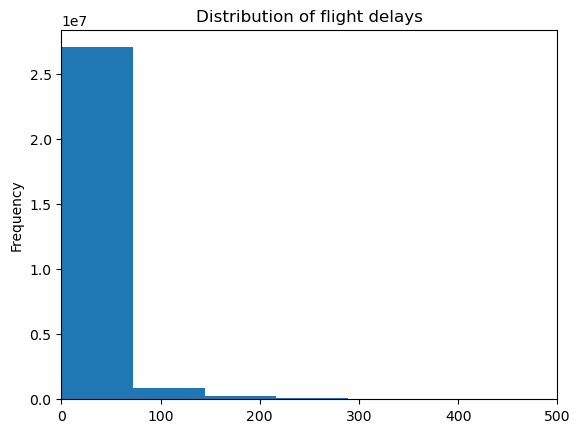

In [66]:
df['DepDelayMinutes'].plot(kind='hist', bins=100, title='Distribution of flight delays', xlim=(0, 500))

<AxesSubplot: title={'center': 'Distribution of flight delays (0-60 Minutes)'}, ylabel='Frequency'>

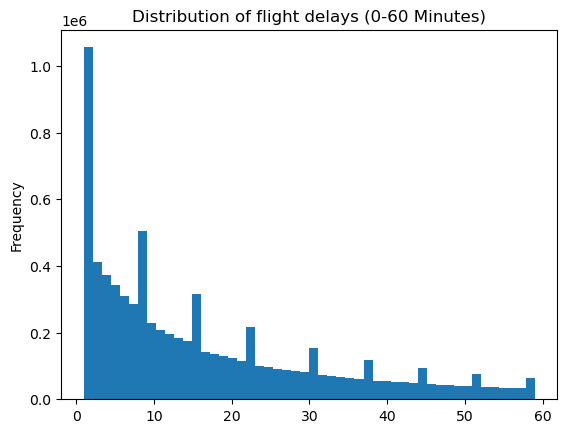

In [67]:
# Since most of the flights have zero or very low delays: it's worth to analyse 
# what's the distribution in the cases when such delays did take place
df.query('DepDelayMinutes > 0 and DepDelayMinutes < 60')['DepDelayMinutes'].plot(
  kind='hist',
  bins=50, 
  title='Distribution of flight delays (0-60 Minutes)'
)

<AxesSubplot: title={'center': 'Distribution of flight delays (< 30 Minutes)'}, ylabel='Frequency'>

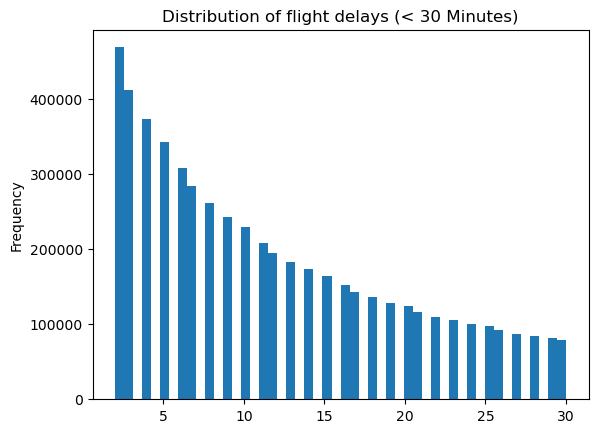

In [69]:
df.query('DepDelayMinutes > 1 and DepDelayMinutes < 31')['DepDelayMinutes'].plot(
  kind='hist',
  bins=50, 
  title='Distribution of flight delays (< 30 Minutes)'
)

In [72]:
df[['CRSDepTime', 'DepTime', 'DepDelayMinutes']]

,CRSDepTime,DepTime,DepDelayMinutes
0,1202,1157.0,0.0
1,1202,1157.0,0.0
2,1202,1153.0,0.0
3,1202,1150.0,0.0
4,1400,1355.0,0.0
...,...,...,...
573774,1255,1301.0,6.0
573775,730,727.0,0.0
573776,800,757.0,0.0
573777,1300,1252.0,0.0


### Grouping for Delays

In [5]:
df['DelayGroup'] = None
df.loc[df['DepDelayMinutes'] == 0, 'DelayGroup'] = 'OnTime_Early'
df.loc[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes'] <= 15), 'DelayGroup'] = 'Small_Delay'
df.loc[(df['DepDelayMinutes'] > 15) & (df['DepDelayMinutes'] <=45), 'DelayGroup'] = 'Medium_Delay'
df.loc[df['DepDelayMinutes'] > 45, 'DelayGroup'] = 'Large_Delay'
df.loc[df['Cancelled'], 'DelayGroup'] = 'Cancelled'

In [74]:
df['DelayGroup'].value_counts()

OnTime_Early    19240509
Small_Delay      4434918
Medium_Delay     2515582
Large_Delay      2224393
Cancelled         777267
Name: DelayGroup, dtype: int64

<AxesSubplot: title={'center': 'Flight Results (2018-2022)'}>

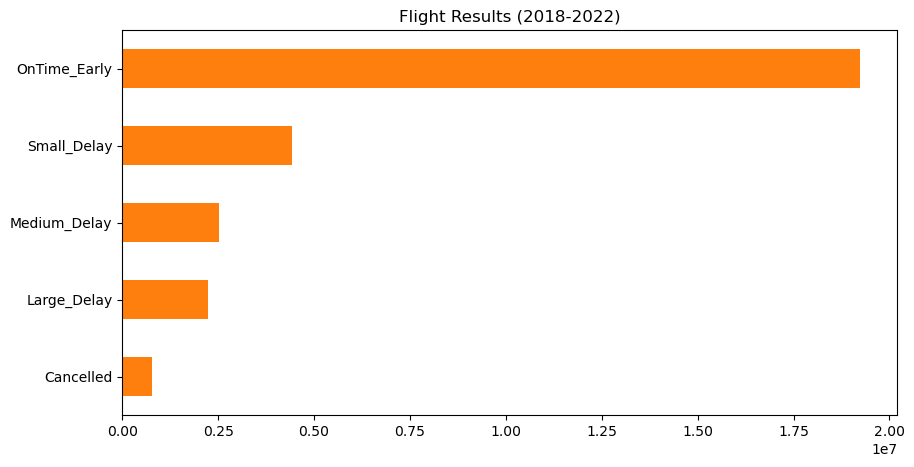

In [75]:
pal = sns.color_palette()

df['DelayGroup'].value_counts(ascending=True).plot(
  kind='barh',
  figsize=(10, 5),
  color=pal[1],
  title='Flight Results (2018-2022)'
)

### How many flights per year

In [6]:
df['Year'] = df['FlightDate'].dt.year

<AxesSubplot: title={'center': 'Scheduled Flights (2018-2022)'}>

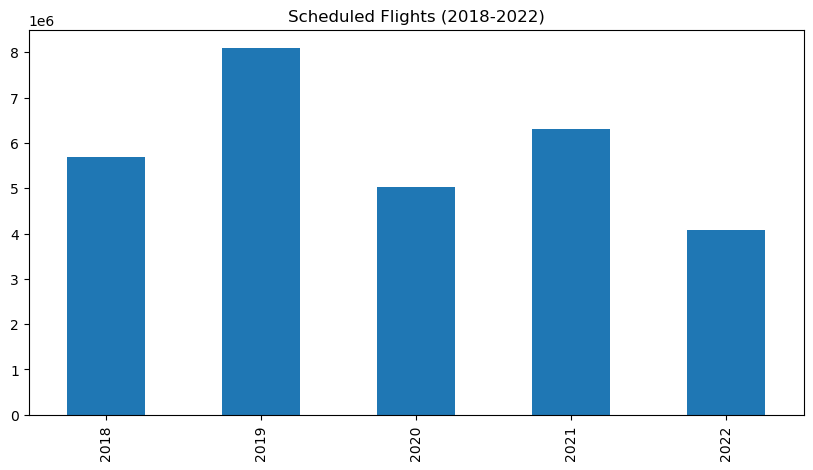

In [83]:
df['Year'].value_counts().sort_index().plot(
  kind='bar', figsize=(10, 5), title='Scheduled Flights (2018-2022)'
)

### What is the percentage of flight results per year

In [7]:

df_agg = df.groupby(by='Year')['DelayGroup'].value_counts(normalize=True).unstack() * 100
df_agg.style.background_gradient(cmap='Greens')

DelayGroup,Cancelled,Large_Delay,Medium_Delay,OnTime_Early,Small_Delay
Year,,,,,
2018,1.553565,8.317789,9.538448,64.115615,16.474583
2019,1.898604,8.683248,9.081583,64.619787,15.716778
2020,5.994249,3.727722,4.572319,76.052291,9.653418
2021,1.758876,7.479795,8.917879,65.698142,16.145308
2022,3.020657,9.545283,10.926539,58.801153,17.706368


### What is the percentage of flight results per month

In [8]:
df['Month'] = df['FlightDate'].dt.month
df_agg = df.groupby(by='Month')['DelayGroup'].value_counts(normalize=True).unstack() * 100
col_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay', 'Large_Delay', 'Cancelled']
df_agg[col_order].style.background_gradient(cmap='Blues')

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,68.169907,13.961832,7.878093,7.008976,2.981192
2,64.960611,15.300969,8.828322,7.786858,3.123240
3,66.363322,14.172305,7.716007,6.173113,5.575252
4,64.436275,14.051844,7.824258,6.853866,6.833756
5,65.023841,16.224252,8.965554,7.875154,1.911198
6,59.488265,17.349791,10.754222,10.442093,1.965629
7,61.996702,16.361900,10.052315,9.906083,1.683000
8,64.622096,15.009025,9.096512,9.137345,2.135022
9,72.924881,13.140776,6.725733,5.813787,1.394822


The table shows that April and May are the months with the most flight cancellations. This high percentage of flight cancellations cannot be explained with variables such as weather conditions (which is often the most common reason for flight cancellations). The nextt plot shows the percentage of flight results excluding the year 2020.

In [9]:
df_agg = df.query('Year != 2020').groupby(by='Month')['DelayGroup'].value_counts(normalize=True).unstack() * 100
col_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay', 'Large_Delay', 'Cancelled']
df_agg[col_order].style.background_gradient(cmap='Blues')

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,67.162457,13.880797,8.068641,7.353867,3.534239
2,62.623134,15.912800,9.424684,8.139587,3.899795
3,65.869000,16.332230,8.904784,7.101697,1.792290
4,66.161402,15.715543,8.783821,7.685515,1.653719
5,63.468665,17.070321,9.537899,8.407955,1.515159
6,56.855480,18.188167,11.525967,11.298683,2.131703
7,58.511717,17.645319,11.048691,10.968325,1.825949
8,60.348823,16.490201,10.289753,10.508081,2.363141
9,70.637088,14.016242,7.374660,6.454308,1.517702


After excluding the year 2020 from the analysis. The results indicate that January and February are the months with the more flight cancellations, which can be indeed attribuited to wheather conditions.

It also makes sense that the first table showed unusually hight rates of flight cancellations during March and April; since it was during those months in 2020 when almost any scheduled flight was cancelled.

### Plot the behavior of flight cancellations per month and year using `calmap`

In [10]:
import calmap

/Users/cristianmurillo/miniconda3/envs/data_science/lib/python3.11/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/Users/cristianmurillo/miniconda3/envs/data_science/lib/python3.11/site-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]
/Users/cristianmurillo/miniconda3/envs/data_science/lib/python3.11/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/Users/cristianmurillo/miniconda3/envs/data_science/lib/python3.11/site-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keywo

Text(0.5, 0.91, 'US Flight Cancellations')

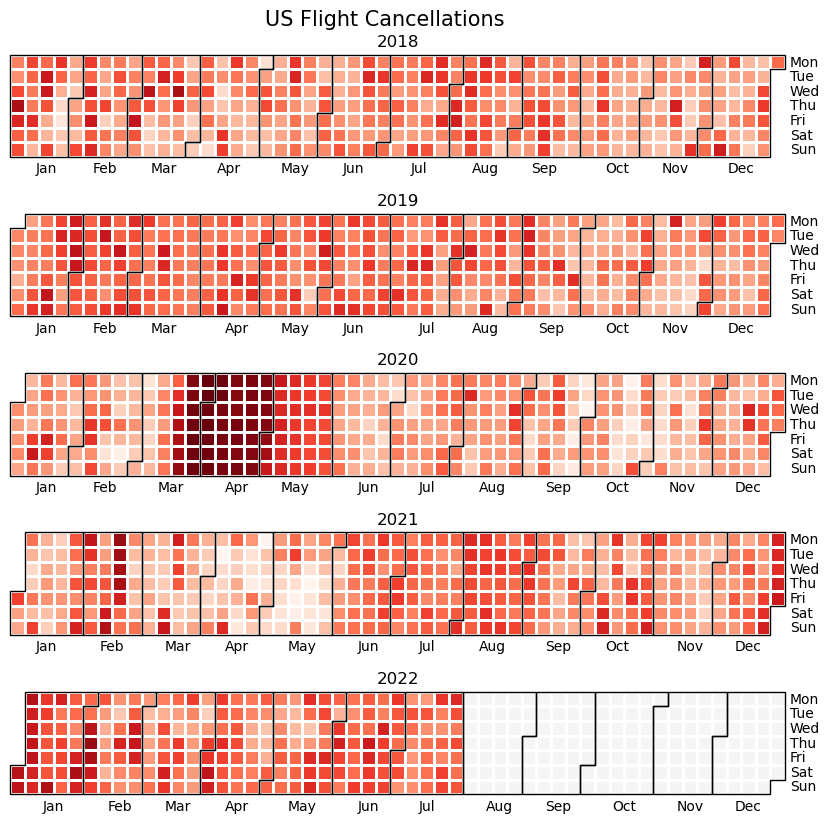

In [23]:
events = df.groupby(by='FlightDate')['Cancelled'].mean()
years = range(2018, 2023)
fig, ax = plt.subplots(len(years), 1, figsize=(10, 10))
for i, year in enumerate(years):
  calmap.yearplot(events.apply(np.log), year=year, monthly_border=True, ax=ax[i])
  ax[i].set_title(year)
fig.suptitle('US Flight Cancellations', y=0.91, fontsize=15)

### Flight behavior per Airline

In [39]:
(
  df['Airline'].value_counts()
  .reset_index()
  .query('Airline > 1000000')
)

,index,Airline
0,Southwest Airlines Co.,5474339
1,Delta Air Lines Inc.,3294917
2,SkyWest Airlines Inc.,3159683
3,American Airlines Inc.,3134117
4,United Air Lines Inc.,2354538
5,Republic Airlines,1283704
6,JetBlue Airways,1106079
7,Envoy Air,1072778


Text(0.5, 1.0, 'Number of Flights per Airline (2018-2022)')

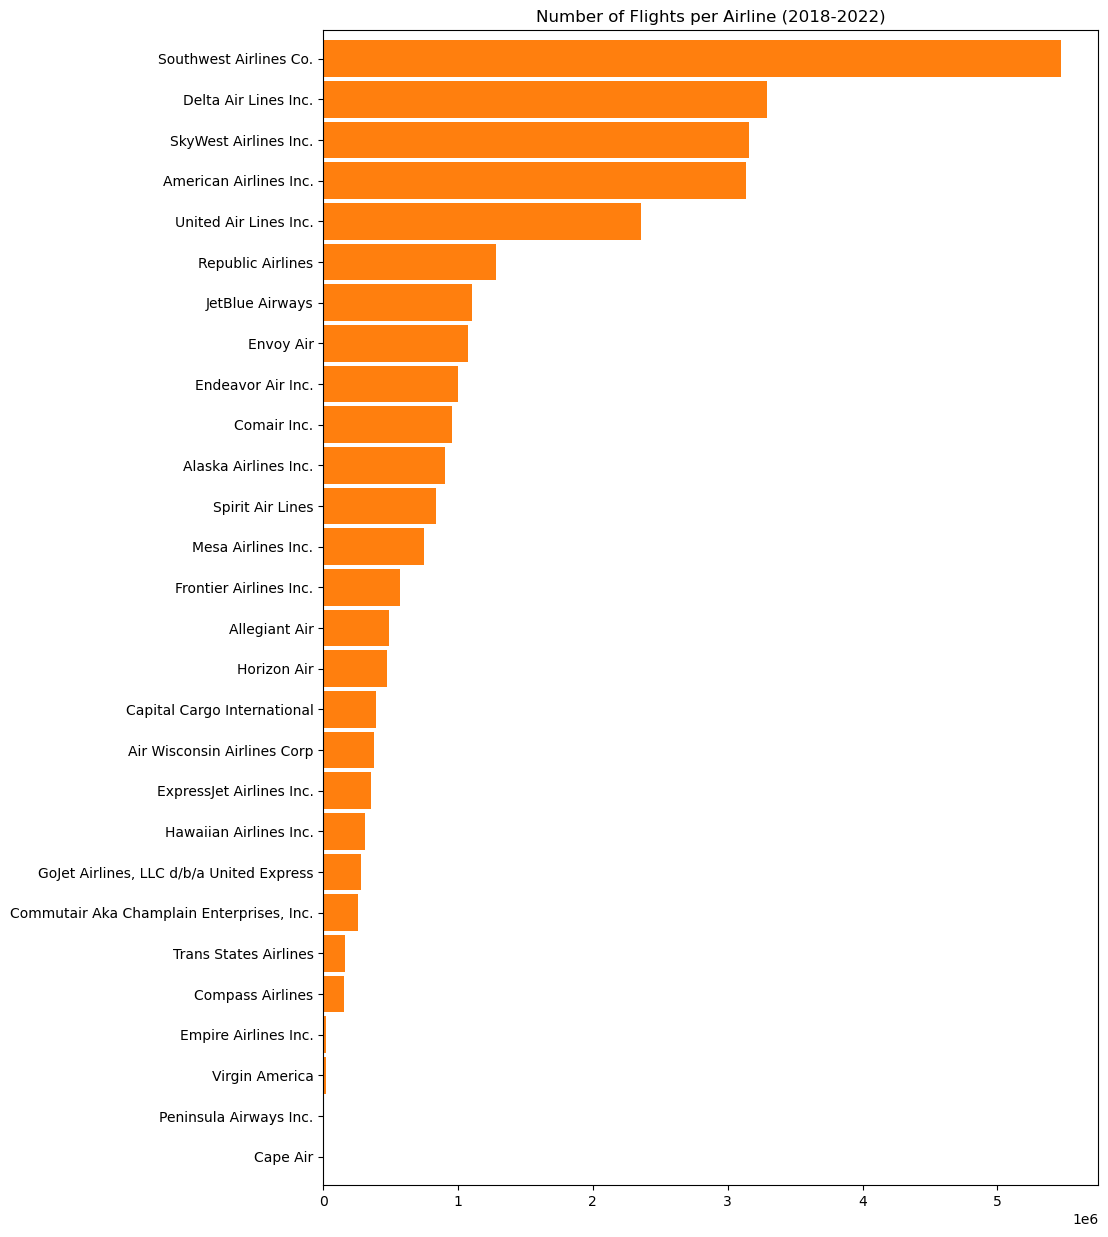

In [69]:
pal = sns.color_palette()
fig, ax = plt.subplots(figsize=(10, 15))
(
  df['Airline']
  .value_counts()
  .sort_values()
  .plot(kind='barh', ax=ax, width=0.9
  , color=pal[1])
);
ax.set_title('Number of Flights per Airline (2018-2022)')

In [24]:
# top_airlines => airlines with more than a million flights
top_airlines = (
  df['Airline'].value_counts()
  .reset_index()
  .query('Airline > 1000000')['index']
  .values.tolist()
)

df_top = df.loc[df['Airline'].isin(top_airlines)].reset_index(drop=True).copy()

In [42]:
df_top['Airline'] = df_top['Airline'].astype('str').astype('category')
col_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay', 'Large_Delay', 'Cancelled']
df_airlines = (df_top.groupby(['Airline'])['DelayGroup'].value_counts(normalize=True).unstack() * 100)[col_order]

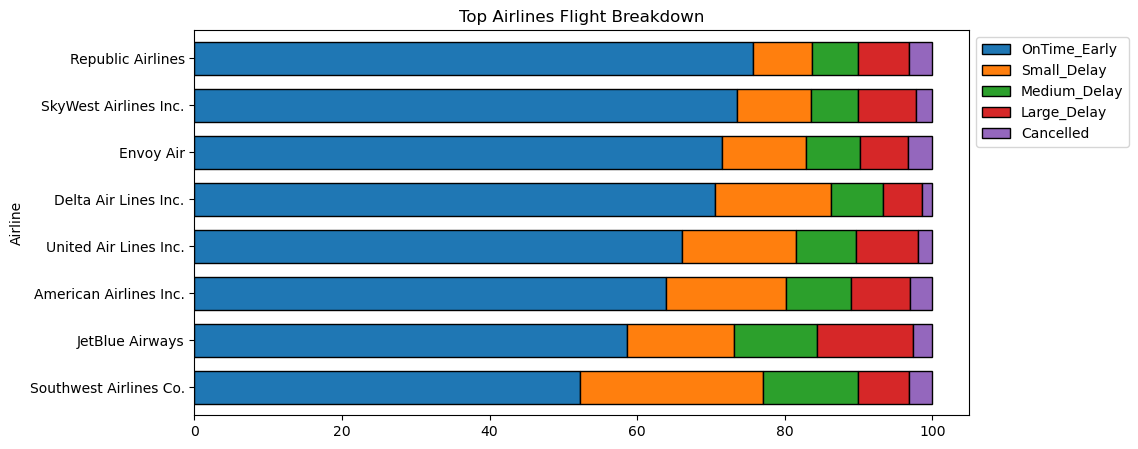

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
df_airlines.sort_values('OnTime_Early').plot(kind='barh', stacked=True, ax=ax, width=0.7, edgecolor='black')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Top Airlines Flight Breakdown')
plt.show()

### Split out each delay type

In [71]:
delay_mapping = {
  'OnTime_Early': 'OK',
  'Small_Delay': 'OK',
  'Medium_Delay': 'Not OK',
  'Large_Delay': 'Not OK',
  'Cancelled': 'Not OK'
}

df_top['DelayOk'] = df_top['DelayGroup'].apply(lambda group: delay_mapping[group])
df_top.head()


,FlightDate,Flight_Number_Marketing_Airline,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Year,Month,DelayOk
0,2018-01-22,626,JetBlue Airways,BWI,BOS,False,False,1013,959.0,0.0,...,Massachusetts,11.0,11.0,1132,1115.0,0.0,OnTime_Early,2018,1,OK
1,2018-01-22,629,JetBlue Airways,MCO,BQN,False,False,2138,2202.0,24.0,...,Puerto Rico,11.0,5.0,118,137.0,19.0,Medium_Delay,2018,1,Not OK
2,2018-01-22,630,JetBlue Airways,BQN,MCO,False,False,238,228.0,0.0,...,Florida,10.0,5.0,433,410.0,0.0,OnTime_Early,2018,1,OK
3,2018-01-22,631,JetBlue Airways,BOS,LGA,False,False,645,641.0,0.0,...,New York,16.0,5.0,808,748.0,0.0,OnTime_Early,2018,1,OK
4,2018-01-22,632,JetBlue Airways,LGA,BOS,False,False,900,917.0,17.0,...,Massachusetts,34.0,6.0,1025,1039.0,14.0,Medium_Delay,2018,1,Not OK


In [76]:
df_agg = (
  (df_top.groupby(['Airline'])['DelayOk']
  .value_counts(normalize=True) * 100)
  .unstack()[['OK', 'Not OK']]
)

df_agg

DelayOk,OK,Not OK
Airline,,
American Airlines Inc.,80.196910,19.803090
Delta Air Lines Inc.,86.311764,13.688236
Envoy Air,82.898699,17.101301
JetBlue Airways,73.128050,26.871950
Republic Airlines,83.719923,16.280077
SkyWest Airlines Inc.,83.529803,16.470197
Southwest Airlines Co.,77.021701,22.978299
United Air Lines Inc.,81.490084,18.509916


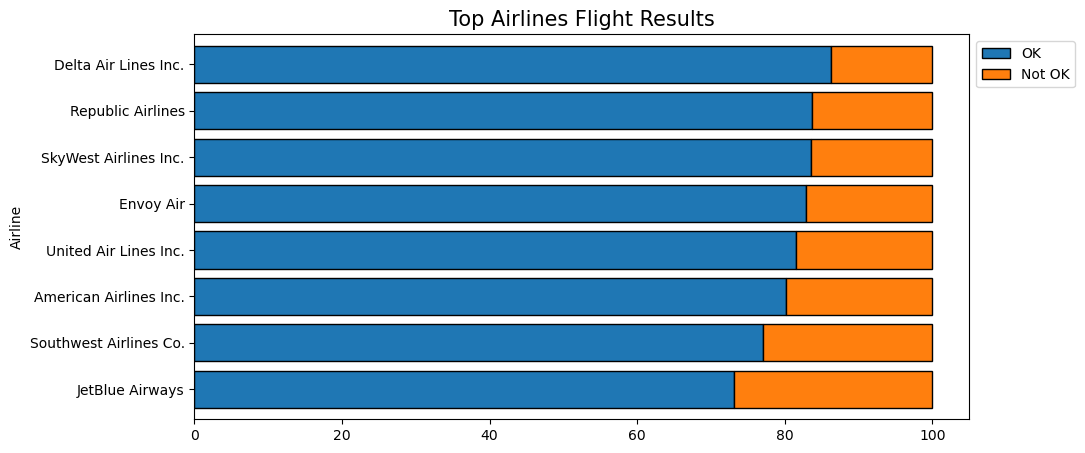

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values('OK').plot(
  kind='barh', stacked=True, ax=ax, width=0.8, edgecolor='black'
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Top Airlines Flight Results', fontsize=15)
plt.show()